### Import Libraries

In [53]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
from sklearn.metrics import roc_curve, auc

### Import File

In [2]:
data = pd.read_csv('airline_passenger_satisfaction.csv')

In [3]:
data.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
data1 = data.drop(columns = ['Unnamed: 0'],axis = 1 )

In [5]:
data1.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   customer_class                     129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure_arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

In [7]:
(data1.isnull().sum()/len(data))*100

Gender                               0.000000
customer_type                        0.000000
age                                  0.000000
type_of_travel                       0.000000
customer_class                       0.000000
flight_distance                      0.000000
inflight_wifi_service                0.000000
departure_arrival_time_convenient    0.000000
ease_of_online_booking               0.000000
gate_location                        0.000000
food_and_drink                       0.000000
online_boarding                      0.000000
seat_comfort                         0.000000
inflight_entertainment               0.000000
onboard_service                      0.000000
leg_room_service                     0.000000
baggage_handling                     0.000000
checkin_service                      0.000000
inflight_service                     0.000000
cleanliness                          0.000000
departure_delay_in_minutes           0.000000
arrival_delay_in_minutes          

In [8]:
data1.shape

(129880, 23)

In [9]:
data1.dropna(inplace = True)

In [10]:
data1.isnull().sum()

Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

In [11]:
data1.shape

(129487, 23)

In [12]:
data1.duplicated().sum()

0

#### EDA

In [13]:
data1 = data1.replace('neutral or dissatisfied','dissatisfied')

In [14]:
data1.head().T

,0,1,2,3,4
Gender,Male,Male,Female,Female,Male
customer_type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
age,13,25,26,25,61
type_of_travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
customer_class,Eco Plus,Business,Business,Business,Business
flight_distance,460,235,1142,562,214
inflight_wifi_service,3,3,2,2,3
departure_arrival_time_convenient,4,2,2,5,3
ease_of_online_booking,3,3,2,5,3
gate_location,1,3,2,5,3


### Univariate Analysis

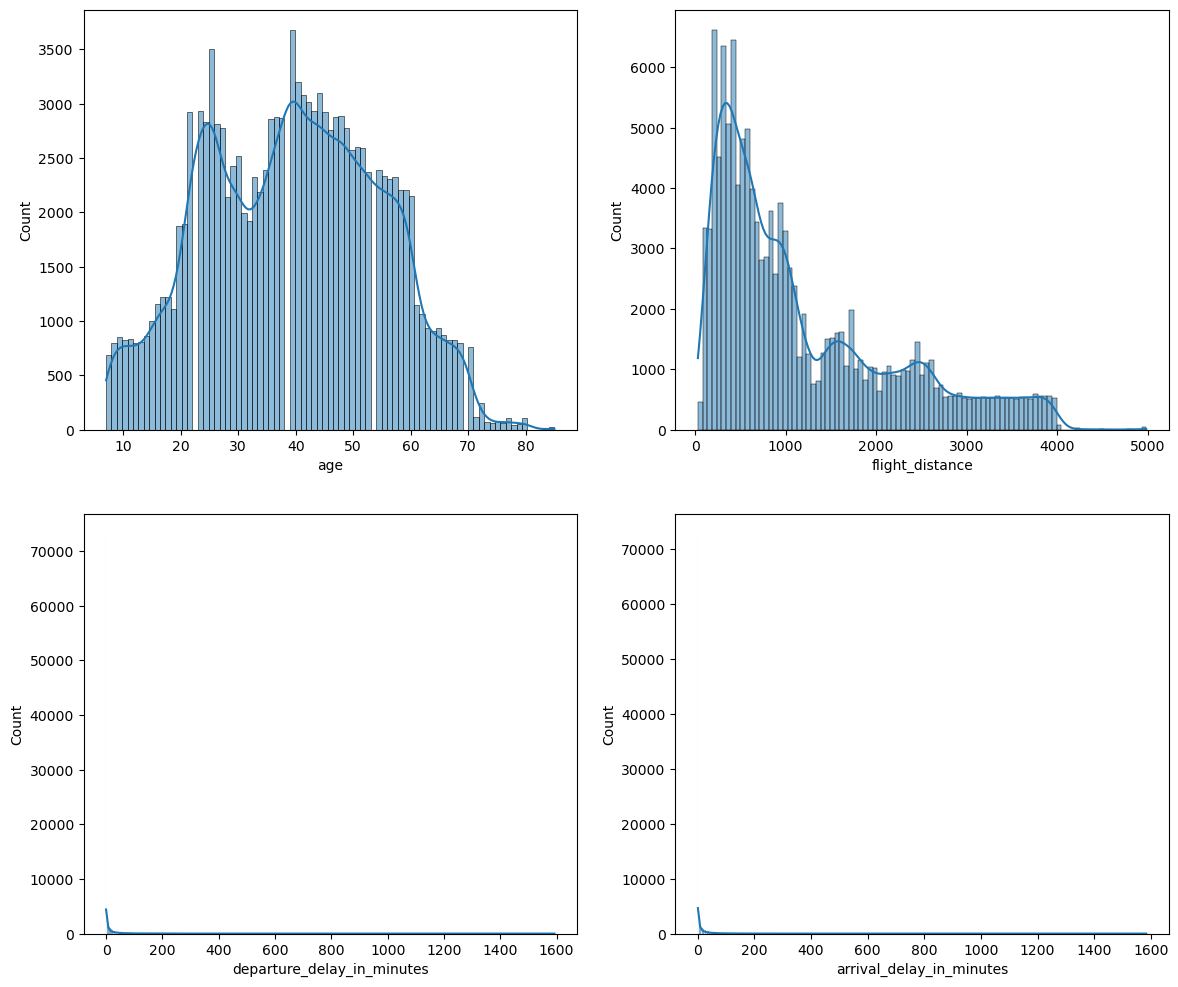

In [15]:
num_col = ['age','flight_distance','departure_delay_in_minutes','arrival_delay_in_minutes']

plt.figure(figsize = (14,12), facecolor = 'white')
plotnumber = 1

for col in num_col:
    plotnumber > 4
    ax = plt.subplot(2,2,plotnumber)
    sns.histplot(x = data1[col],kde = True)
    plotnumber += 1

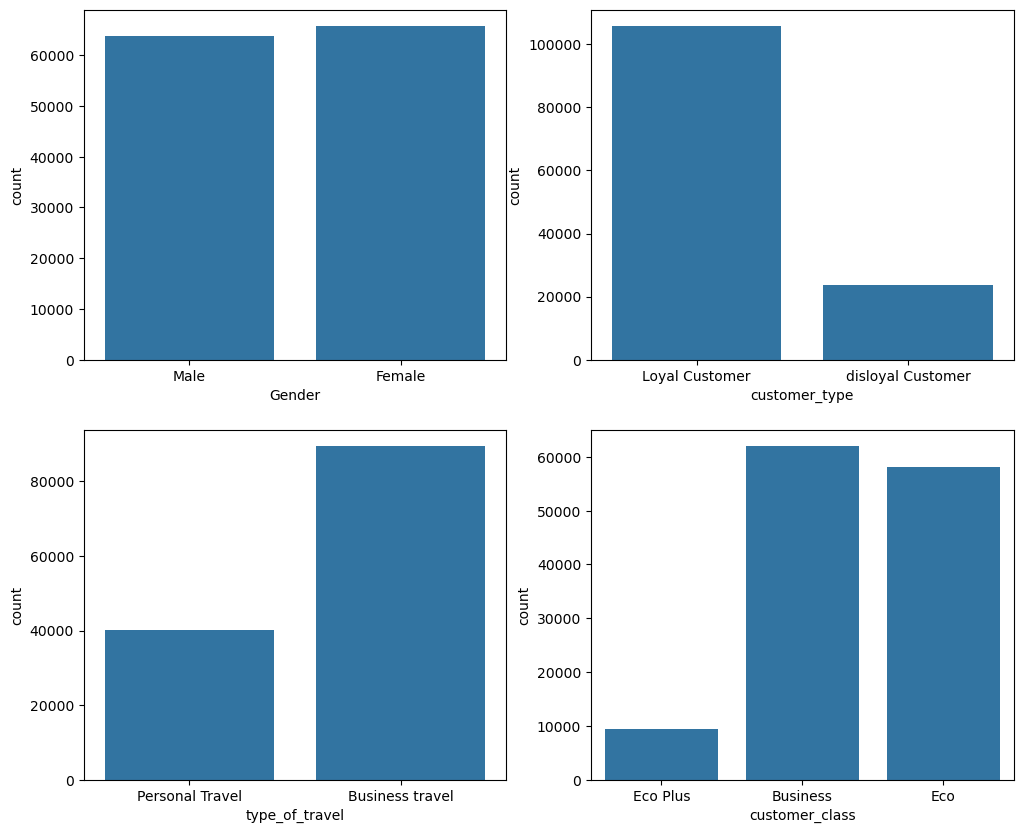

In [16]:
cols = ['Gender','customer_type','type_of_travel','customer_class']

plt.figure(figsize = (12,10),facecolor ='white')
plotnumber = 1

for col in cols:
    plotnumber >=  4
    ax = plt.subplot(2,2,plotnumber)
    sns.countplot(x = data1[col])
    plotnumber += 1

### Bivariate Analysis

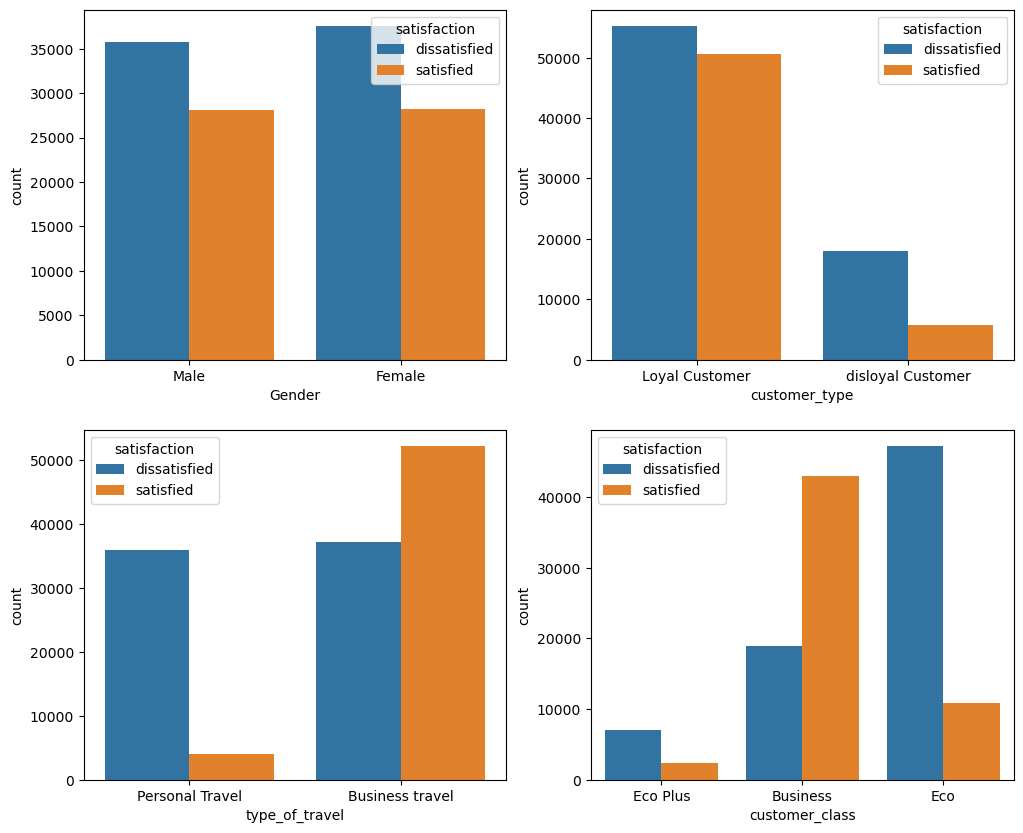

In [17]:
cols = ['Gender','customer_type','type_of_travel','customer_class']

plt.figure(figsize = (12,10),facecolor ='white')
plotnumber = 1

for col in cols:
    plotnumber >=  4
    ax = plt.subplot(2,2,plotnumber)
    sns.countplot(x = data1[col], hue = data1['satisfaction'])
    plotnumber += 1

### Service Analysis

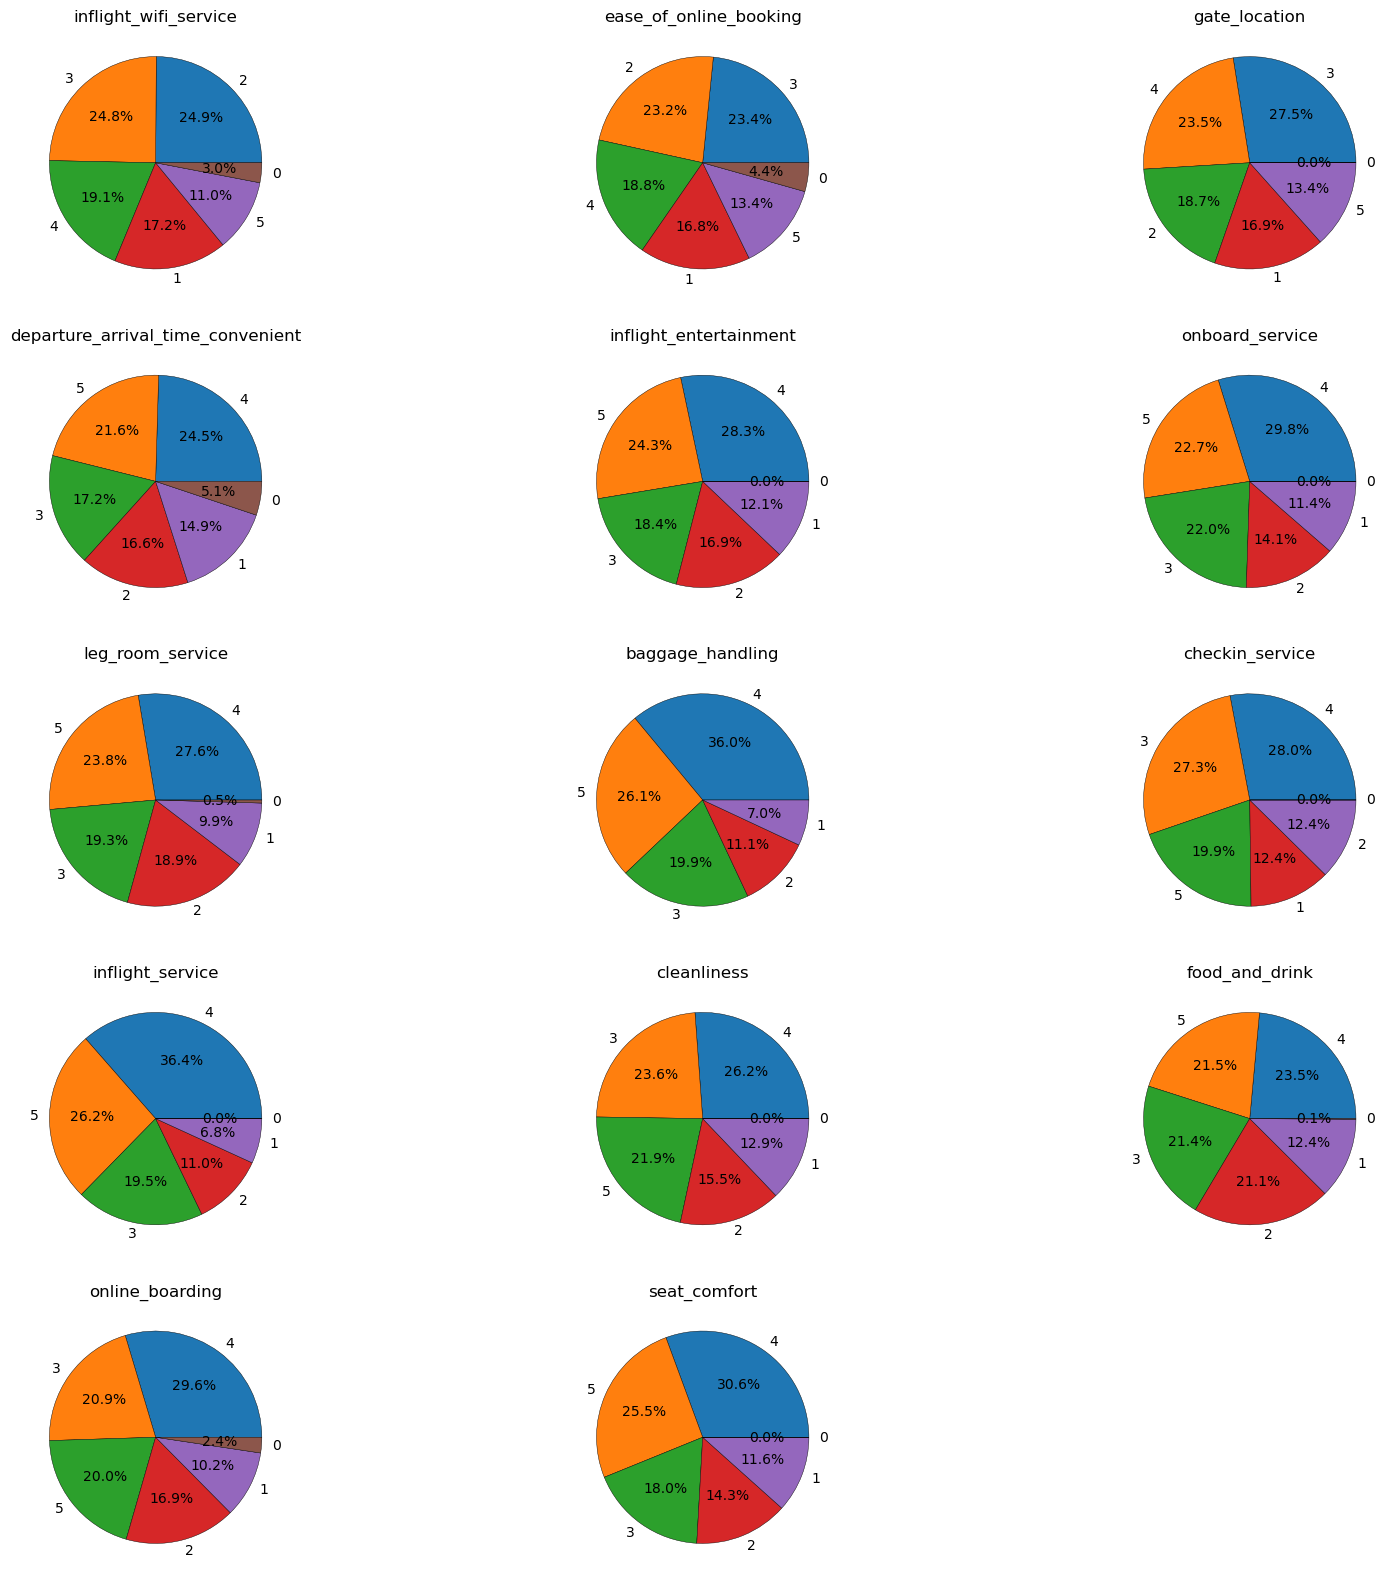

In [18]:
cols = ['inflight_wifi_service','ease_of_online_booking','gate_location','departure_arrival_time_convenient',
        'inflight_entertainment','onboard_service','leg_room_service','baggage_handling','checkin_service',
        'inflight_service','cleanliness','food_and_drink','online_boarding','seat_comfort']

cols_counts = data1[col].value_counts
cols_name = cols.index

plt.figure(figsize = (20,20),facecolor = 'white')
plotnumber = 1

for col in cols:
    counts = data1[col].value_counts()
    labels = counts.index
   
    ax= plt.subplot(5,3,plotnumber)
    plt.pie(counts ,labels = labels,autopct='%1.1f%%',labeldistance=1.1,wedgeprops = {'linewidth' :0.3,'edgecolor' : 'black'})
    plt.title(col)
    plotnumber += 1

### Dependent variable

<Axes: xlabel='satisfaction', ylabel='count'>

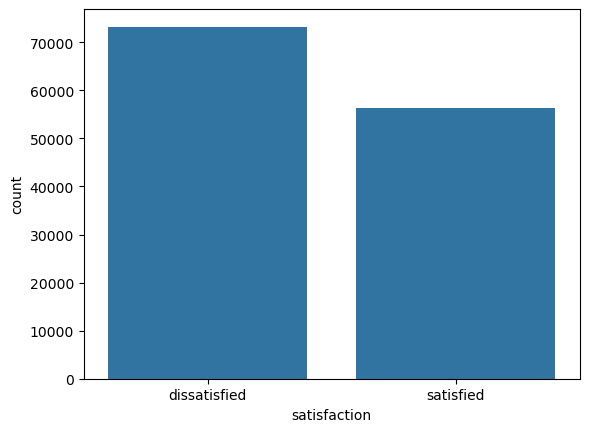

In [19]:
sns.countplot(x=data1['satisfaction'])

### Outlier Detection

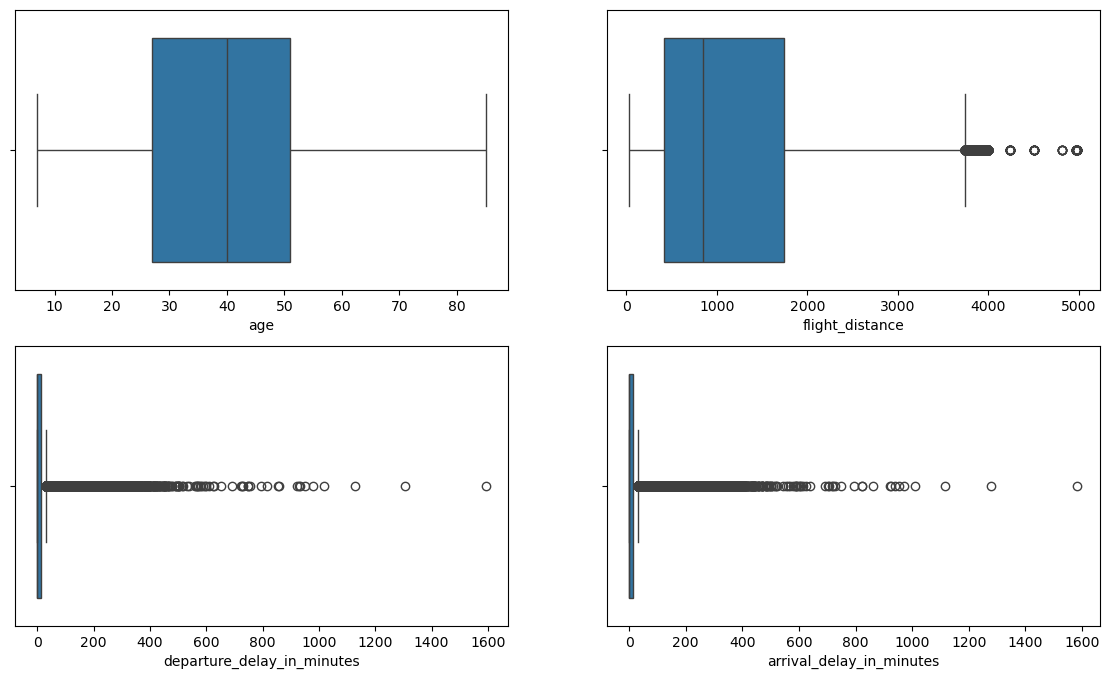

In [20]:
num_col = ['age','flight_distance','departure_delay_in_minutes','arrival_delay_in_minutes']

plt.figure(figsize = (14,8), facecolor = 'white')
plotnumber = 1

for col in num_col:
    plotnumber > 4
    ax = plt.subplot(2,2,plotnumber)
    sns.boxplot(x = data1[col])
    plotnumber += 1

In [21]:
#Outliers are seen but loyal and premium customers are included in long flight distance .

### relation between independent variable

<Axes: xlabel='departure_delay_in_minutes', ylabel='arrival_delay_in_minutes'>

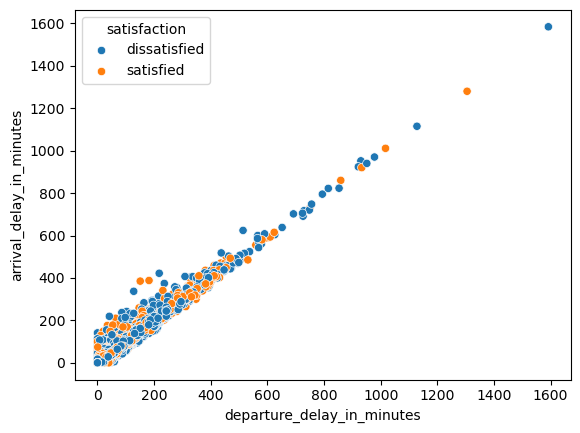

In [22]:
sns.scatterplot(y = data1['arrival_delay_in_minutes'], x = data1['departure_delay_in_minutes'],hue = data1['satisfaction'])

In [23]:
#there is linear relation between independent variable so either have to combine both or remove one of them.

### Pre_processing

In [24]:
data1['Total_delay'] = data1['arrival_delay_in_minutes']+ data1['departure_delay_in_minutes']

In [25]:
data1.drop(columns =['arrival_delay_in_minutes','departure_delay_in_minutes'],axis =1)

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction,Total_delay
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,dissatisfied,43.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,dissatisfied,7.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,satisfied,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,dissatisfied,20.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,satisfied,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,4,3,2,4,4,5,4,dissatisfied,0.0
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,4,5,5,5,5,4,satisfied,0.0
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,2,4,3,4,5,4,2,dissatisfied,0.0
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,4,3,2,5,4,5,4,satisfied,0.0


In [26]:
data1.shape

(129487, 24)

In [27]:
data2 = data1.copy()

### Encoding


In [28]:
#label encoder for ordered data.

LB = LabelEncoder()
data2['customer_class'] = LB.fit_transform(data1['customer_class'])
data2['customer_class']

0         2
1         0
2         0
3         0
4         0
         ..
129875    0
129876    0
129877    1
129878    0
129879    1
Name: customer_class, Length: 129487, dtype: int32

In [29]:
data2.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,Total_delay
0,Male,Loyal Customer,13,Personal Travel,2,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,dissatisfied,43.0
1,Male,disloyal Customer,25,Business travel,0,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,dissatisfied,7.0
2,Female,Loyal Customer,26,Business travel,0,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,0.0
3,Female,Loyal Customer,25,Business travel,0,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,dissatisfied,20.0
4,Male,Loyal Customer,61,Business travel,0,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,0.0


In [30]:
#one hot encoding for unordered data.

cols = ['Gender','customer_type','type_of_travel','satisfaction']
data2 = pd.get_dummies(data2 ,columns = cols ,drop_first = True).astype(int)

In [31]:
data2.drop(columns = ['departure_delay_in_minutes','arrival_delay_in_minutes'],axis = 1,inplace = True)

### Correlation

<Axes: >

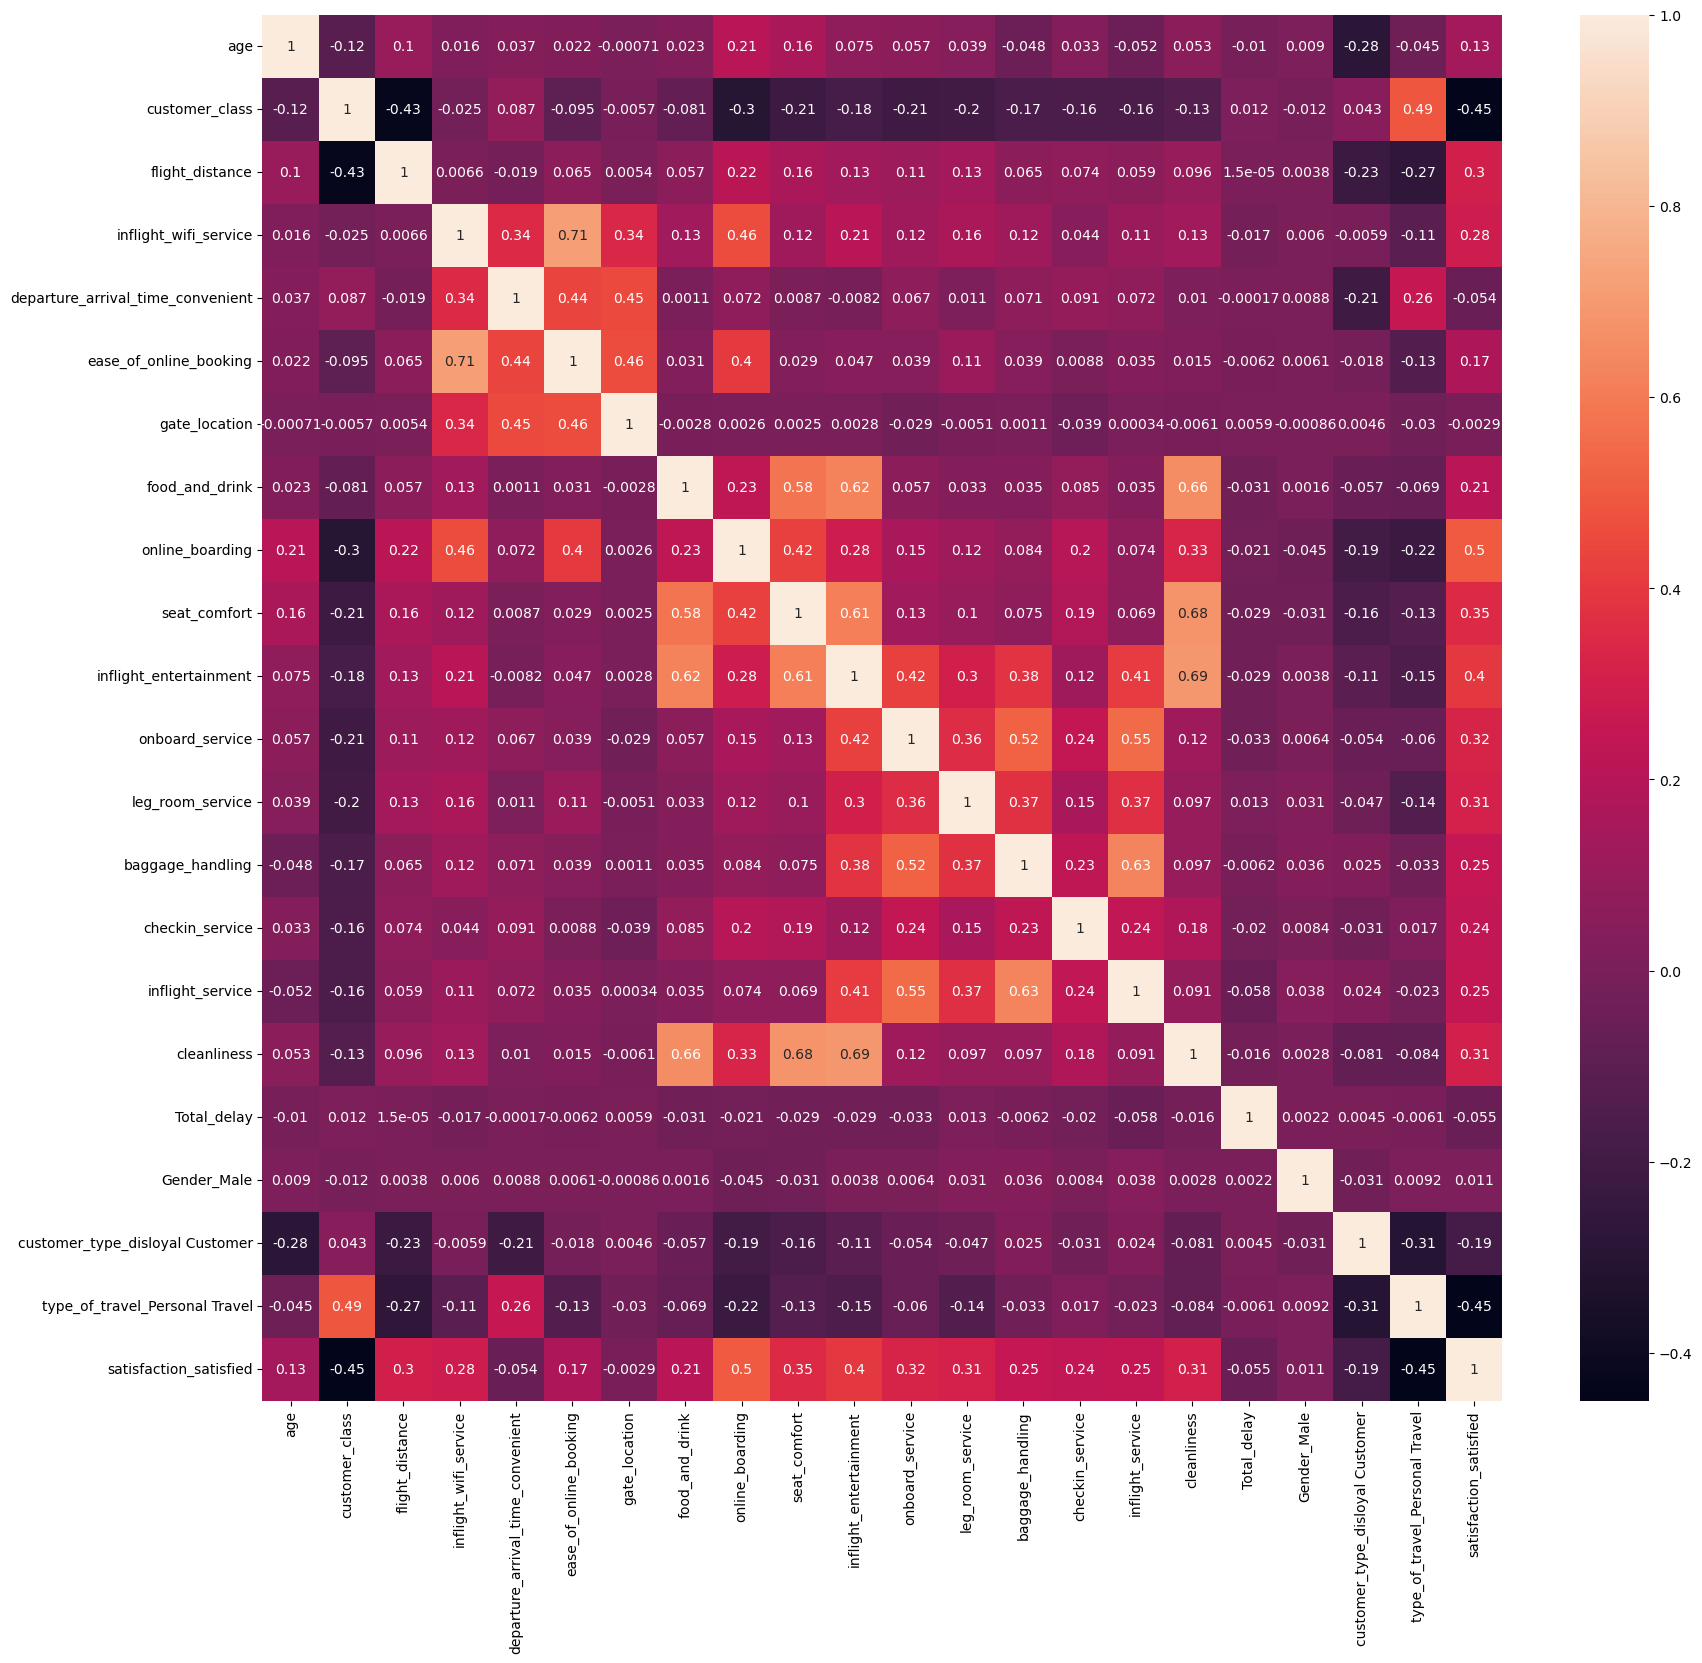

In [32]:
plt.figure(figsize = (20,18),facecolor = 'white')
sns.heatmap(data2.corr(),annot = True)

### Scaling

In [33]:
X = data2.drop(columns = ['satisfaction_satisfied'] , axis=1)
y= data2['satisfaction_satisfied']

In [34]:
x = StandardScaler().fit_transform(X)
x

array([[-1.74821856,  2.26322297, -0.73199886, ...,  1.01493148,
        -0.47349456,  1.4945834 ],
       [-0.95443854, -0.95547863, -0.95754986, ...,  1.01493148,
         2.11195667, -0.66908277],
       [-0.8882902 , -0.95547863, -0.04832872, ..., -0.98528819,
        -0.47349456, -0.66908277],
       ...,
       [-1.48362522,  0.65387217, -0.36309767, ..., -0.98528819,
        -0.47349456,  1.4945834 ],
       [-1.68207023, -0.95547863, -0.06336546, ...,  1.01493148,
        -0.47349456, -0.66908277],
       [ 0.17008317,  0.65387217, -0.92847884, ..., -0.98528819,
        -0.47349456,  1.4945834 ]])

### Train test split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33 , random_state = 42)

In [36]:
x_train.shape

(86756, 21)

In [37]:
x_test.shape

(42731, 21)

In [38]:
y_train.shape

(86756,)

In [39]:
y_test.shape

(42731,)

### ModelCreation

### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'],
    'max_depth': np.arange(1,8),
    'min_samples_split': np.arange(1,8),
    'min_samples_leaf': np.arange(1,8)
}
GSV = GridSearchCV(dt_model, param_grid, cv=5)
DT_model = GSV.fit(x_train,y_train) 
DT_model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7]),
                         'min_samples_split': array([1, 2, 3, 4, 5, 6, 7])})

In [41]:
y_pred = DT_model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     24236
           1       0.94      0.89      0.92     18495

    accuracy                           0.93     42731
   macro avg       0.93      0.92      0.93     42731
weighted avg       0.93      0.93      0.93     42731



In [43]:
accu_score=accuracy_score(y_test,y_pred)
accu_score

0.9288806721115818

### RandomForest

In [44]:
RF_model = RandomForestClassifier().fit(x_train,y_train)
RF_model

RandomForestClassifier()

In [45]:
y_pred_rf = RF_model.predict(x_test)
y_pred_rf

array([1, 0, 0, ..., 0, 1, 0])

In [46]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     24236
           1       0.97      0.94      0.96     18495

    accuracy                           0.96     42731
   macro avg       0.96      0.96      0.96     42731
weighted avg       0.96      0.96      0.96     42731



In [48]:
Accu_score = accuracy_score(y_test, y_pred_rf)
Accu_score

0.9620416091362243

### ROC AUC

In [49]:
dt_prob = DT_model.predict_proba(x_test)[:,1]
rf_prob = RF_model.predict_proba(x_test)[:,1]

print('dt_prob -',dt_prob)
print('rf_prob -',rf_prob)

dt_prob - [0.98843294 0.10721692 0.         ... 0.         0.98843294 0.32774674]
rf_prob - [1.   0.05 0.   ... 0.   1.   0.48]


In [51]:
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_prob)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)

dt_auc = auc(dt_fpr, dt_tpr)
rf_auc = auc(rf_fpr, rf_tpr)

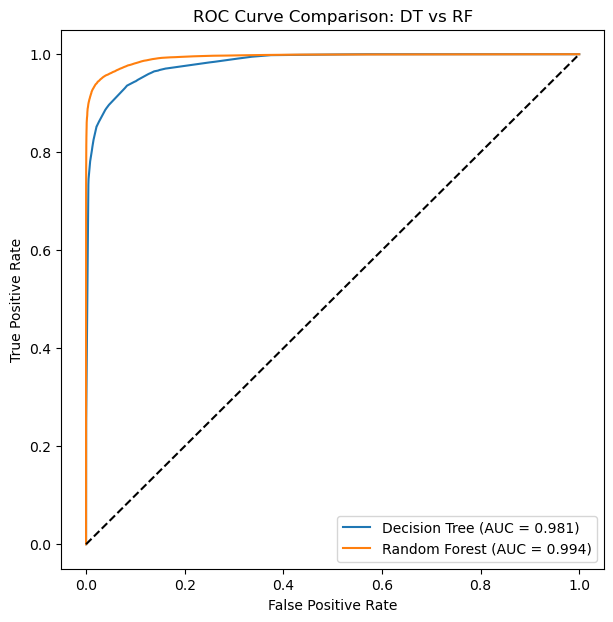

In [52]:
plt.figure(figsize=(7,7))

plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {dt_auc:.3f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: DT vs RF")
plt.legend()
plt.show()

### Gradient Boost